# What is pandas?

In this chapter, you will get introduced to the pandas library and see examples of many of the data analysis tasks it is able to complete.

![][1]


### What is pandas?
pandas is one of the most popular open source data exploration libraries currently available. It gives its users the power to explore, manipulate, query, aggregate, and visualize **tabular** data. Tabular meaning data that is two-dimensional with rows and columns; i.e. a table.

### Why pandas and not xyz?
In this current age of data explosion, there are now dozens of other tools that have many of the same capabilities as the pandas library. However, there are many aspects of pandas that make it an attractive choice for data analysis and it continues to have one of the fastest growing user bases.

* It's a Python library and integrates well with the other popular data science libraries such as numpy, scikit-learn, statsmodels, matplotlib and seaborn.
* It is nearly self-contained in that lots of functionality is built into one package. This contrasts with R, where many packages are needed to obtain the same functionality.
* The community is excellent. Looking at Stack Overflow, for example, there are [many ten's of thousands of][2] pandas questions. If you need help, you are nearly guaranteed to find it quickly. 

### Why is it named after an East Asian bear?

The pandas library was begun by Wes McKinney beginning in 2008 at a hedge fund named AQR. In the financial world, it is common to refer to tabular data  as 'panel data' which smashed together becomes pandas. If you are really interested in the history, you can hear it from the creator [himself][3].

### Python already has data structures to handle data, why do we need another one?

Even though Python is a high-level language, its primary built-in data structure to contain a sequence of values, lists, are not built for scientific computing. Lists are a general purpose data structure that can store any object of any type and are not optimized for tabular data analysis. What lacks, is a data structure that contains homogeneous data types for fast access and numerical computation. This data structure, usually referred to as an 'array' in most languages is provided by the numpy third-part library.

### pandas is built directly on numpy

[numpy][4] ('numerical Python') is the most popular third-party Python library for scientific computing and forms the foundation for dozens of others, including pandas. numpy's primary data structure is an n-dimensional array which is much more powerful than a Python list and with much better performance.

All of the data in pandas is stored in numpy arrays. That said, it isn't necessary to know much about numpy when learning pandas. You can think of pandas as a higher-level, easier to use interface for doing data analysis than numpy. It is a good idea to eventually learn numpy, but for most tasks, pandas will be the right tool.

## pandas operates on tabular (table) data

There are numerous formats for data such as XML, JSON, raw bytes, and many others. But, for our purposes, we will only be examining what most people think of when they think of data - a table. pandas is built just for analyzing this tabular, rectangular, very deceptively normal concept of data. pandas has the capability to read in many different formats of data, but they all will be converted to tabular data.

### The DataFrame and Series

The DataFrame and Series are the two primary pandas objects that we will be using throughout this book.

* **DataFrame** - A two-dimensional data structure that looks like any other rectangular table of data you have seen with rows and columns.
* **Series** - A single dimension of data. It is analogous to a single column of data or a one dimensional array.

[1]: images/pandas_logo.png
[2]: http://stackoverflow.com/questions/tagged/pandas
[3]: https://www.youtube.com/watch?v=kHdkFyGCxiY
[4]: http://www.numpy.org/

## pandas examples

The rest of this chapter is dedicated to showing examples of what pandas is capable of doing. There will be one or two examples from each of the following major areas of the library.

* Reading data
* Filtering data
* Aggregating methods
* Non-Aggregating methods
* Aggregating within groups
* Tidying data
* Joining data
* Time series analysis
* Visualization

The goal is to give you a broad overview of what pandas is capable of doing. You are not expected to understand the syntax but rather get a few ideas of what you can expect to accomplish when using pandas. Explanations will be brief, but hopefully will provide just enough information so that you can logically follow what the end result is.

### The `head` method

You will notice that many of the last lines of code end with the `head` method. By default, this method returns the first five rows of the DataFrame or Series that call it. The purpose of this method is to limit the output so that it easily fits on a screen or page in a book. If the `head` method is not used, then pandas will display the first 60 rows of data by default. To reduce output even further, an integer (usually 3) will be passed to the `head` method. This integer controls the number of rows returned.

## Reading data
There will be multiple datasets used during the rest of this chapter. pandas can read in a variety of different data formats. The `read_csv` function is able to read in text data that is separated by a delimiter. By default, the delimiter is a comma. Below, we read in public bike usage data from the city of Chicago into a pandas DataFrame.

In [1]:
import pandas as pd
bikes = pd.read_csv('../data/bikes.csv')
bikes.head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Subscriber,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,Michigan Ave & Oak St,41.90096,-87.623777,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Subscriber,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,Wells St & Walton St,41.89993,-87.634430,19.0,69.1,10.0,6.9,-9999.0,partlycloudy
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,Dearborn St & Monroe St,41.88132,-87.629521,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy


## Filtering data
pandas can filter the rows of a DataFrame based on whether the values in that row meet a condition. For instance, we can select only the rides that had a `tripduration` greater than 5000 (seconds). This example is a single condition that gets tested for each row. Only the rows that meet this condition are returned.

### Single Condition

In [2]:
filt = bikes['tripduration'] > 5000
bikes[filt].head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
18,40924,Subscriber,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,41.878114,-87.639971,35.0,Millennium Park,41.881032,-87.624084,35.0,79.0,10.0,13.8,0.0,cloudy
40,61401,Subscriber,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,8.1,-9999.0,partlycloudy
77,87005,Subscriber,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,41.856594,-87.627542,15.0,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,82.9,10.0,5.8,-9999.0,mostlycloudy


### Multiple Conditions

We can test for multiple conditions in a single row. The following example only returns riders that are female **and** have a `tripduration` greater than 5000.

In [3]:
filt1 = bikes['tripduration'] > 5000
filt2 = bikes['gender'] == 'Female'
filt = filt1 & filt2
bikes[filt].head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
40,61401,Subscriber,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,8.1,-9999.0,partlycloudy
77,87005,Subscriber,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,41.856594,-87.627542,15.0,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,82.9,10.0,5.8,-9999.0,mostlycloudy
1954,1103416,Subscriber,Female,2013-12-28 11:37:00,2013-12-28 13:34:00,7050,LaSalle St & Washington St,41.882664,-87.632530,15.0,Theater on the Lake,41.926277,-87.630834,15.0,44.1,10.0,12.7,-9999.0,clear


The next example has multiple conditions but only requires that one of the conditions is true. It returns all the rows where either the rider is female **or** the `tripduration` is greater than 5000.

In [4]:
filt = filt1 | filt2
bikes[filt].head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
9,23558,Subscriber,Female,2013-07-04 15:00:00,2013-07-04 15:16:00,922,Lakeview Ave & Fullerton Pkwy,41.925858,-87.638973,19.0,Racine Ave & Congress Pkwy,41.874640,-87.657030,19.0,81.0,10.0,12.7,-9999.0,mostlycloudy
14,31121,Subscriber,Female,2013-07-06 12:39:00,2013-07-06 12:49:00,610,Morgan St & Lake St,41.885483,-87.652305,15.0,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15.0,82.0,10.0,5.8,-9999.0,mostlycloudy
18,40924,Subscriber,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,41.878114,-87.639971,35.0,Millennium Park,41.881032,-87.624084,35.0,79.0,10.0,13.8,0.0,cloudy


## Aggregating methods

The technical definition of an **aggregation** is when a sequence of values is summarized by a **single** number. For example, sum, mean, median, min, and mix are all examples of aggregation functions. By default, calling these methods on a pandas DataFrame will apply the aggregation to each column. Below, we use a dataset containing the percentage of undergraduate races for all US colleges.

In [5]:
college = pd.read_csv('../data/college.csv', index_col='instnm')
cr = college.loc[:, 'ugds_white':'ugds_unkn']
cr.head(3)

,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn
instnm,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715


The `mean` method returns the mean of each column.

In [6]:
cr.mean()

ugds_white    0.510207
ugds_black    0.189997
ugds_hisp     0.161635
ugds_asian    0.033544
ugds_aian     0.013813
ugds_nhpi     0.004569
ugds_2mor     0.023950
ugds_nra      0.016086
ugds_unkn     0.045181
dtype: float64

pandas allows you to aggregate rows as well. You must use the `axis` parameter to change the direction of the aggregation.

In [7]:
cr.sum(axis=1).head(3)

instnm
Alabama A & M University               1.0000
University of Alabama at Birmingham    0.9999
Amridge University                     1.0000
dtype: float64

## Non-aggregating methods

There are methods that perform some calculation on the DataFrame that do not aggregate the data and usually preserve the shape of the DataFrame. For example, the `round` method will round each number to a given decimal place. 

In [8]:
cr.round(2).head(3)

,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn
instnm,,,,,,,,,
Alabama A & M University,0.03,0.94,0.01,0.00,0.0,0.0,0.00,0.01,0.01
University of Alabama at Birmingham,0.59,0.26,0.03,0.05,0.0,0.0,0.04,0.02,0.01
Amridge University,0.30,0.42,0.01,0.00,0.0,0.0,0.00,0.00,0.27


## Aggregating within groups

Above, we performed aggregations on the entire DataFrame. We can instead perform aggregations within groups of the data. Below we use an insurance dataset.

In [9]:
ins = pd.read_csv('../data/insurance.csv')
ins.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


One of the simplest aggregations is the frequency of occurrence of all the unique values within a single column. This is performed below with the `value_counts` method.

### Frequency of unique values in a single column

In [10]:
ins['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Single aggregation function

Let's say we wish to find the mean charges for each of the unique values in the `sex` column. The `groupby` method gives us this functionality.

In [11]:
ins.groupby('sex').agg({'charges': 'mean'}).round(-3)

,charges
sex,
female,13000.0
male,14000.0


### Multiple aggregation functions

pandas allows us to perform multiple aggregations at the same time. Below, we calculate the mean and max of the `charges` column as well as count the number of non-missing values.

In [12]:
ins.groupby('sex').agg({'charges': ['mean', 'max', 'count']}).round(0)

charges               
           mean      max count
sex                           
female  12570.0  63770.0   662
male    13957.0  62593.0   676

### Multiple Grouping columns

pandas allows us to form groups based on multiple columns. In the below example, each unique combination of `sex` and `region` form a group. For each of these groups, the same aggregations as above are performed on the `charges` column.

In [13]:
ins.groupby(['sex', 'region']).agg({'charges': ['mean', 'max', 'count']}).round(0)

charges               
                     mean      max count
sex    region                           
female northeast  12953.0  58571.0   161
       northwest  12480.0  55135.0   164
       southeast  13500.0  63770.0   175
       southwest  11274.0  48824.0   162
male   northeast  13854.0  48549.0   163
       northwest  12354.0  60021.0   161
       southeast  15880.0  62593.0   189
       southwest  13413.0  52591.0   163

### Pivot Tables
We can reproduce the exact same output as above in a different shape with the `pivot_table` method. It groups and aggregates the same way as `groupby` but places the unique values of one of the grouping columns as the new columns in the resulting DataFrame. Notice that pivot tables make for easier comparisons across groups.

In [14]:
pt = ins.pivot_table(index='sex', columns='region', 
                     values='charges', aggfunc='mean').round(0)
pt

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.0,12480.0,13500.0,11274.0
male,13854.0,12354.0,15880.0,13413.0


### Styling DataFrames

To help make your data really pop-out, pandas enables you to style DataFrames in various ways. Below, the maximum value of each column is highlighted.

In [15]:
pt.style.highlight_max()

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.000000,12480.000000,13500.000000,11274.000000
male,13854.000000,12354.000000,15880.000000,13413.000000


## Tidying

Many datasets need to be cleaned and tidied before we can perform analysis on them. pandas provides many tools to prepare our data for further analysis.

### Options in the `read_csv` function

Below, we read in a new dataset on plane crashes. Notice all the question marks. They represent missing values, but pandas will read them in as strings.

In [16]:
pc = pd.read_csv('../data/tidy/planecrashinfo.csv')
pc.head(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...


The `read_csv` has dozens of options to help read in messy data. One of the options allows you to convert a particular string to missing values. Notice that all of the question marks are now labeled as `NaN` (not a number).

In [17]:
pc = pd.read_csv('../data/tidy/planecrashinfo.csv', na_values='?')
pc.head(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offsh...


### String manipulation

Often times there is data stuck within a string column that you will need to extract. The `aboard` column appears to have three distinct pieces of information; the total number of people on board, the number of passengers, and the number of crew.

In [18]:
aboard = pc['aboard']
aboard.head()

0     2  (passengers:1 crew:1)
1     1  (passengers:0 crew:1)
2     5  (passengers:0 crew:5)
3     1  (passengers:0 crew:1)
4    20  (passengers:? crew:?)
Name: aboard, dtype: object

pandas has special functionality for manipulating strings. Below, we use a regular expression to extract the pertinent numbers from the `aboard` column.

In [19]:
aboard.str.extract(r'(\d+)?\D*(\d+)?\D*(\d+)?').head()

,0,1,2
0,2,1,1
1,1,0,1
2,5,0,5
3,1,0,1
4,20,NaN,NaN


### Reshaping into tidy form

Occasionally, you will have several columns of data that all belong in a single column. Take a look at the DataFrame below on average arrival delay of airlines at different airports. All the columns with three-letter airport codes could be placed in the same column as they all contain the arrival delay which has the same units.

In [20]:
aad = pd.read_csv('../data/tidy/average_arrival_delay.csv').head()
aad

,airline,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
0,AA,4.0,9.0,5.0,11.0,8.0,3.0,1.0,8.0,5.0,3.0
1,AS,6.0,-3.0,-5.0,1.0,2.0,-3.0,6.0,2.0,-9.0,4.0
2,B6,NaN,12.0,4.0,NaN,11.0,2.0,NaN,23.0,20.0,5.0
3,DL,0.0,-3.0,10.0,3.0,-3.0,3.0,-1.0,7.0,-4.0,0.0
4,EV,7.0,14.0,10.0,3.0,NaN,NaN,10.0,8.0,-14.0,NaN


The `melt` method stacks columns one on top of the other. Here, it places all of the three-letter airport code columns into a single column. The first two airports (ATL and DEN) are shown below in the new tidy DataFrame.

In [21]:
aad.melt(id_vars='airline', var_name='airport', value_name='delay').head(10)

,airline,airport,delay
0,AA,ATL,4.0
1,AS,ATL,6.0
2,B6,ATL,NaN
3,DL,ATL,0.0
4,EV,ATL,7.0
5,AA,DEN,9.0
6,AS,DEN,-3.0
7,B6,DEN,12.0
8,DL,DEN,-3.0
9,EV,DEN,14.0


## Joining Data
pandas can join multiple DataFrames together by matching values in one or more columns. If you are familiar with SQL, then pandas performs joins in a similar fashion. Below, we make a connection to a database and read in two of its tables.

In [22]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../data/neurIPS.db')

authors = pd.read_sql('Authors', engine)
pa = pd.read_sql('PaperAuthors', engine)

Output the first 5 rows of each DataFrame.

In [23]:
authors.head(3)

,Id,Name
0,178,Yoshua Bengio
1,200,Yann LeCun
2,205,Avrim Blum


In [24]:
pa.head(3)

,Id,PaperId,AuthorId
0,1,5677,7956
1,2,5677,2649
2,3,5941,8299


We can now join these tables together using the `merge` method. The `AuthorID` column from the `pa` table is aligned with the `Id` column of the `authors` table.

In [25]:
pa.merge(authors, how='left', left_on='AuthorId', right_on='Id').head(3)

,Id_x,PaperId,AuthorId,Id_y,Name
0,1,5677,7956,7956,Nihar Bhadresh Shah
1,2,5677,2649,2649,Denny Zhou
2,3,5941,8299,8299,Brendan van Rooyen


## Time Series Analysis

One of the original purposes of pandas was to do time series analysis. Below, we read in 4 years of Apple's closing stock price data with help from [Quandl API][0]. Instructions for setting up this API are found in the **Case Study: Calculating Normality of Stock Market Returns** chapter of the **Essential Commands** part.

[0]: https://www.quandl.com

In [26]:
import quandl

with open('../api_key.txt') as f:
    api_key = f.read()
    
aapl = quandl.get(dataset='WIKI/AAPL', start_date='2014-01-01', 
                  end_date='2017-12-31', api_key=api_key)
aapl = aapl[['Adj. Close', 'Adj. Volume']]
aapl.columns = ['close', 'volume']
aapl.head(3)

,close,volume
Date,,
2014-01-02,73.523423,58671200.0
2014-01-03,71.908415,98116900.0
2014-01-06,72.300536,103152700.0


### Select a period of time

pandas allows us to easily select a period of time. Below, we select all of the trading data from February 27, 2017 through March 2, 2017.

In [27]:
aapl['2017-02-27':'2017-03-02']

,close,volume
Date,,
2017-02-27,135.820848,20257426.0
2017-02-28,135.880362,23482860.0
2017-03-01,138.657681,36414585.0
2017-03-02,137.834404,26210984.0


### Group by time

We can group by some length of time. Here, we group together every month of trading data and return the average closing price of that month.

In [28]:
aapl_mc = aapl.resample('M').agg({'close':'mean'})
aapl_mc.head(3)

,close
Date,
2014-01-31,71.438619
2014-02-28,70.347470
2014-03-31,71.297968


## Visualization

pandas provides basic visualization abilities by giving its users a few nice default plots. Below, we plot the average monthly closing price of Apple for the last 5 years.

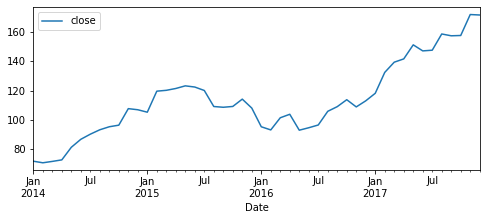

In [29]:
%matplotlib inline
aapl_mc.plot(kind='line', figsize=(8, 3));

Here, we use the college race data to create a box plot of each of the race percentage columns.

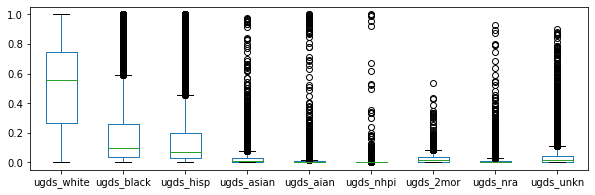

In [30]:
cr.plot(kind='box', figsize=(10, 3));

We turn our pivot table from above into a bar graph.

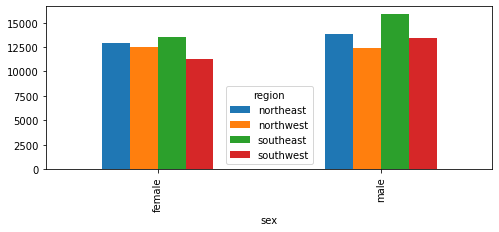

In [31]:
pt.plot(kind='bar', figsize=(8, 3));

## Much More

The above was just a small sampling that pandas has to offer, but does show many basic examples from many of the major sections of the library.